In [8]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from PIL import Image
import numpy as np

# Check resizing methods

In [9]:
image_path='images/test1.webp'
nb_pixel=(64, 64)

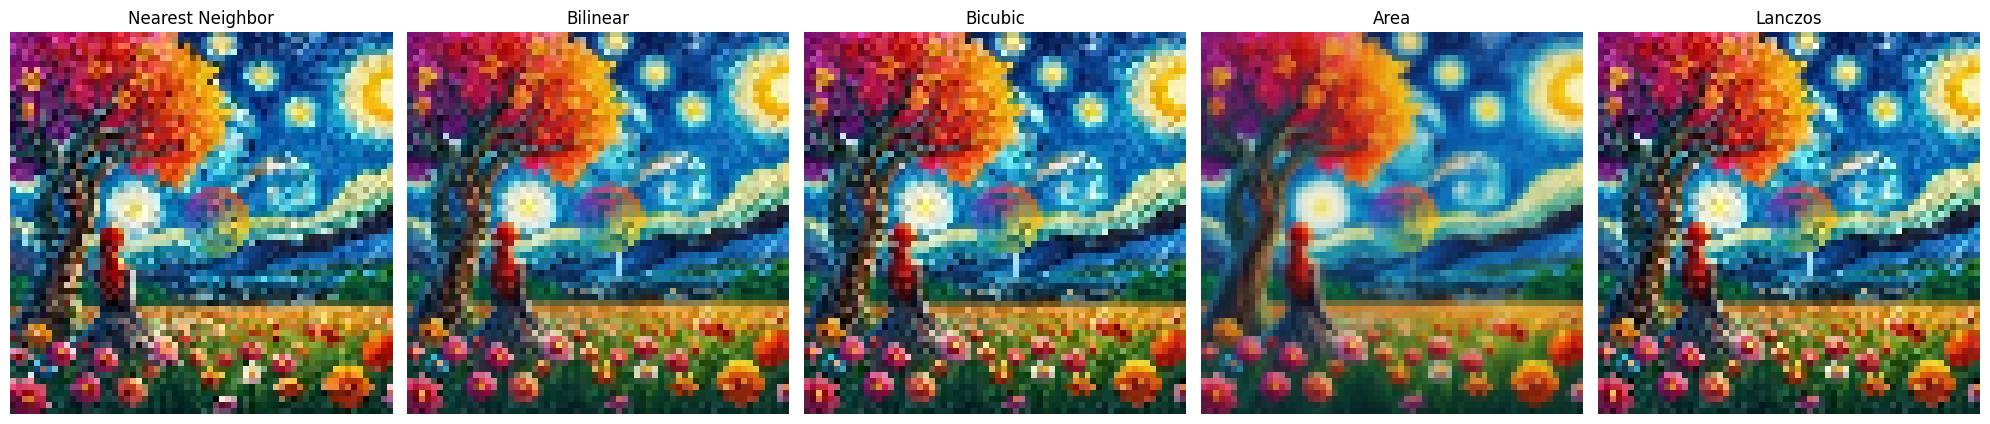

In [10]:
def compare_rescaling_methods(image_path,nb_pixel):
  """
  Compares different rescaling methods for resizing an image to 64x64 pixels.

  Args:
    image_path: Path to the image file.
  """

  # Load the image
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Rescaling methods
  methods = [
      ("Nearest Neighbor", cv2.INTER_NEAREST),
      ("Bilinear", cv2.INTER_LINEAR),
      ("Bicubic", cv2.INTER_CUBIC),
      ("Area", cv2.INTER_AREA),
      ("Lanczos", cv2.INTER_LANCZOS4)
  ]

  # Create subplots
  fig, axes = plt.subplots(1, len(methods), figsize=(20, 5))

  # Rescale and display images
  for i, (method_name, method) in enumerate(methods):
    resized_image = cv2.resize(image,nb_pixel , interpolation=method)
    axes[i].imshow(resized_image)
    axes[i].set_title(method_name)
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()

compare_rescaling_methods(image_path,nb_pixel)

# image to lego

In [11]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


def load_and_resize_image(image_path, size):
    """Load image, convert BGR to RGB, and resize it."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
    return resized_image


def hex_to_rgb(hex_color):
    """Convert a hex color (RRGGBB string) to an RGB tuple."""
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))


def load_lego_colors(excel_path):
    """Load LEGO colors from Excel and filter by year."""
    df = pd.read_excel(excel_path)
    df = df[df['Last Year'] >= 2000]
    df['color'] = df['RGB'].apply(hex_to_rgb)
    return df


def find_nearest_color(pixel_color, color_df):
    """Find the nearest LEGO color to the given pixel RGB value."""
    min_distance = float('inf')
    nearest_color = None
    for _, row in color_df.iterrows():
        color = row['color']
        distance = np.linalg.norm(np.array(pixel_color) - np.array(color))
        if distance < min_distance:
            min_distance = distance
            nearest_color = color
    return nearest_color


def map_image_to_lego_colors(image_array, color_df):
    """Replace each pixel in the image with the nearest LEGO color."""
    new_image_array = np.zeros_like(image_array)
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            pixel_color = image_array[i, j, :3]
            nearest_color = find_nearest_color(pixel_color, color_df)
            new_image_array[i, j, :3] = nearest_color
    return new_image_array


def plot_originals_and_lego_images(original, lego_array):
    """Plot original and LEGO-colored images side by side."""
    lego_image = Image.fromarray(lego_array.astype('uint8'))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(lego_image)
    plt.title('LEGO Color Mapped Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


def get_lego_color_counts(image_array, color_df):
    """Count unique LEGO colors in the image and return as DataFrame with names."""
    unique_colors, counts = np.unique(image_array.reshape(-1, 3), axis=0, return_counts=True)

    # Create RGB to name mapping
    rgb_to_name = {
        tuple(row['color']): row['Name']
        for _, row in color_df.iterrows()
    }

    color_names = [rgb_to_name.get(tuple(color), 'Unknown') for color in unique_colors]

    return pd.DataFrame({
        'Index': range(len(unique_colors)),
        'Color (RGB)': [tuple(color) for color in unique_colors],
        'Color Name': color_names,
        'Quantity': counts
    })


# Main execution

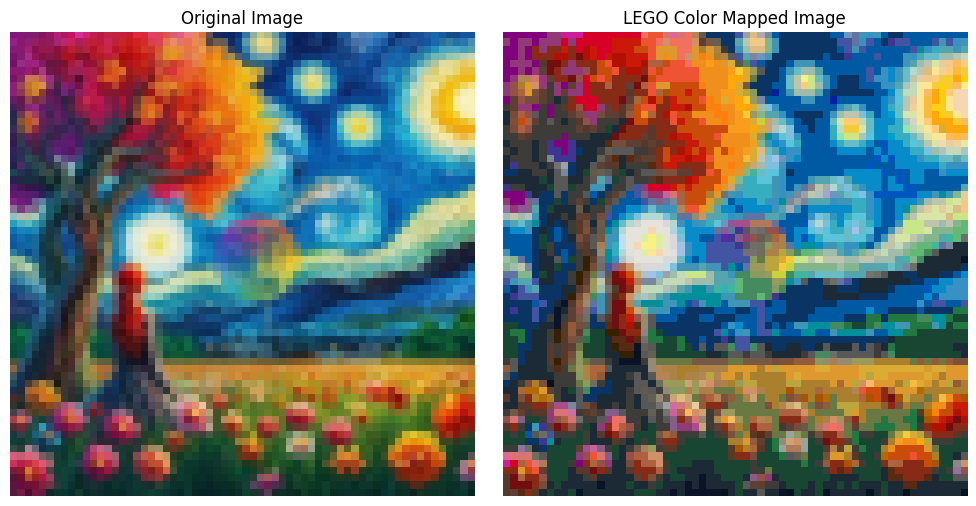

     Index      Color (RGB)                    Color Name  Quantity
0        0     (0, 32, 160)               Trans-Dark Blue         2
1        1     (0, 85, 191)                          Blue        19
2        2     (0, 89, 163)                    Pearl Blue       303
3        3    (0, 143, 155)                Dark Turquoise        49
4        4    (0, 158, 206)                    Duplo Blue         2
..     ...              ...                           ...       ...
120    120  (252, 183, 109)  Trans-Flame Yellowish Orange         1
121    121   (255, 128, 13)             Trans-Neon Orange        13
122    122   (255, 167, 11)                 Medium Orange        18
123    123  (255, 203, 120)         Warm Yellowish Orange         9
124    124   (255, 207, 11)                Clikits Yellow         6

[125 rows x 4 columns]


In [12]:

image_path='images/test1.webp'
excel_path = 'lego.xlsx'
target_size = (64, 64)

# load img and lego + resize
resized_image = load_and_resize_image(image_path, target_size)
lego_df = load_lego_colors(excel_path)

# map 2 lego brick
mapped_array = map_image_to_lego_colors(resized_image, lego_df)
plot_originals_and_lego_images(resized_image, mapped_array)

# get the lego brick list
lego_counts_df = get_lego_color_counts(mapped_array, lego_df)
print(lego_counts_df)

# new method in test

In [13]:
def apply_clahe(image):
    """Apply CLAHE to improve contrast in low-contrast areas and limit it in high-contrast ones."""
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    merged = cv2.merge((cl, a, b))
    enhanced_image = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)
    return enhanced_image


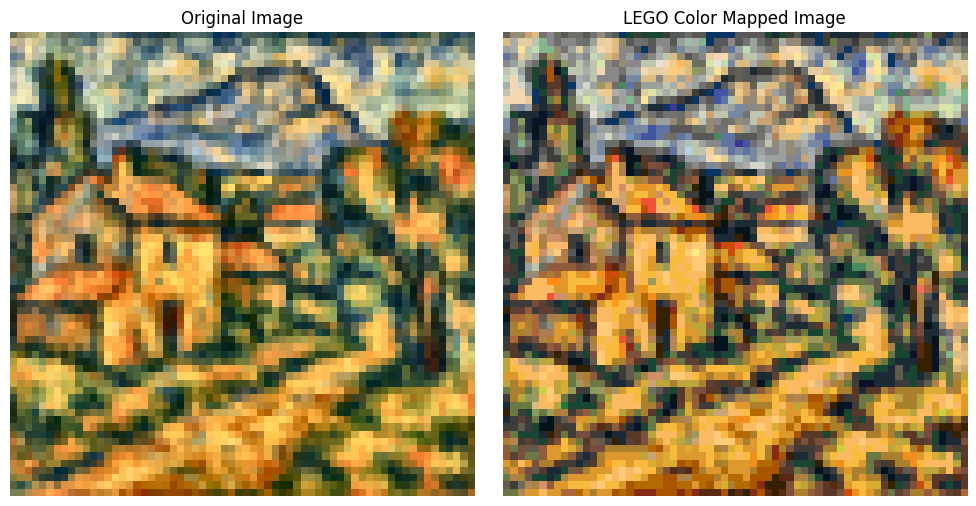

    Index      Color (RGB)                    Color Name  Quantity
0       0      (5, 19, 29)                         Black        58
1       1     (10, 19, 39)                   Pearl Black        29
2       2     (10, 52, 99)                     Dark Blue        39
3       3     (24, 70, 50)                    Dark Green       176
4       4     (27, 42, 52)                  Chrome Black       240
..    ...              ...                           ...       ...
76     76  (251, 230, 150)                  Light Yellow         9
77     77  (251, 232, 144)             Trans-Fire Yellow         3
78     78  (252, 183, 109)  Trans-Flame Yellowish Orange         6
79     79   (254, 138, 24)                        Orange         2
80     80  (255, 203, 120)         Warm Yellowish Orange        74

[81 rows x 4 columns]


In [14]:
# --- Main Execution Flow ---
image_path='images/AI_img.png'
excel_path = 'lego.xlsx'
target_size = (64, 64)  # Example resize dimensions

original = load_and_resize_image(image_path, target_size)
resized_image = apply_clahe(original)
lego_df = load_lego_colors(excel_path)

mapped_array = map_image_to_lego_colors(resized_image, lego_df)
plot_originals_and_lego_images(resized_image, mapped_array)


lego_counts_df = get_lego_color_counts(mapped_array, lego_df)
print(lego_counts_df)